## Break Even Rate

Bonds with European call option just have a single possible call date ($t_c$).
Also the notice time as $t_n$, and the call price with $X$.

In general, we can assume that **it is optimal for the issuer to minimize the value of the contract**.

It means the issuer will exercise the option if the price of the callable bond exceeds the exercise price at the notice date. Otherwise, she will give up the option right and the callable bond price will be equal to that of the non-option bond.

Denote by $r_b$ the *break-even* interest rate which represents the rate value such that the issuer is indifferent between exercising the option or not.

It can be calculated by,

$$X\cdot D(t_n, t_c) - P(r,t_n)=0$$

where $D(t_n, t_c)$ is the discount factor between notice and exercise dates and $P(r,t_n)$ the price of the callable bond an instant before the notice date.

We know the value of the callable bond $P(r,t_n)$ since it is equal to the value of the non-option bond. The solution of equation is the cross point between the two curves.

In [1]:
import numpy as np
from scipy.optimize import newton

def bond_price(F, K, r, t0, T, tau=1):
  def price(r_i):
    val = 0
    for t in range(t0, T+1):
      val += K * tau * np.exp(-r_i*t)
    val += np.exp(-r_i*t)
    return val*F

  if type(r) == float or type(r) == np.float64:
    return price(r)
  else:
    p = np.zeros_like(r)
    for i in range(len(p)):
      p[i] = price(r[i])
    return p

def exercise_price(X, r, dt):
  return X*np.exp(-r*dt)

def break_even(r, F, X, K, t0, T, dt, tau=1):
  return bond_price(F, K, r, t0, T, tau) - exercise_price(X, r, dt)

K = 0.03      # bond coupon
F = 100       # bond face value
X = 102       # exercise cost

T = 5         # maturity in years
exercise = 3  # exercise date in years
dt = 0.1      # t_exercise - t_notice

rb = newton(break_even, 0.4, args=(F, X, K, exercise, T, dt))
print (rb)
P_b = bond_price(F, K, rb, exercise, T)

0.013780701821991204


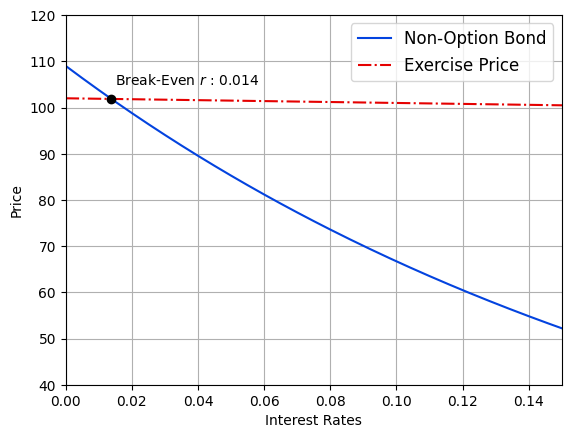

In [2]:
import matplotlib.pyplot as plt

r = np.arange(0, 0.5, 0.001)
prices = bond_price(F, K, r, exercise, T)

plt.plot(r, prices, label="Non-Option Bond", color='xkcd:blue')
plt.plot(r, exercise_price(X, r, dt), linestyle="-.",
         color='xkcd:red', label="Exercise Price")
plt.scatter(rb, P_b, color='black', zorder=3)
plt.text(0.015, 105, "Break-Even $r$ : {:.3f}".format(rb))
plt.xlim(0.0, 0.15)
plt.ylim(40, 120)
plt.ylabel("Price")
plt.xlabel("Interest Rates")
plt.grid(True)
plt.legend(fontsize="12")
plt.show()
